In [ ]:
!ls

sample_data


In [ ]:
print("\nWelcome to advanced top sites")
!ls
!rm -f spark-3.5.1-bin-hadoop3.tgz*
!rm -rf spark-3.5.1-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar -xf spark-3.5.1-bin-hadoop3.tgz
!ls -alt


Welcome to advanced top sites
sample_data
--2024-05-13 18:21:55--  https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400446614 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.1-bin-hadoop3.tgz’

spark-3.5.1-bin-had 100%[===================>] 381.90M   187MB/s    in 2.0s    

2024-05-13 18:22:06 (187 MB/s) - ‘spark-3.5.1-bin-hadoop3.tgz’ saved [400446614/400446614]

total 391084
drwxr-xr-x  1 root root      4096 May 13 18:22 .
drwxr-xr-x  1 root root      4096 May 13 18:20 ..
drwxr-xr-x  1 root root      4096 May  9 13:24 sample_data
drwxr-xr-x  4 root root      4096 May  9 13:24 .config
-rw-r--r--  1 root root 400446614 Feb 15 11:39 spark-3.5.1-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Feb 15 11:36 spark-3.5.1-bin-hadoop3


In [ ]:
# install findspark if not already installed
!pip3 install findspark

In [ ]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
# "SparkSession" and "sc" are are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
# Import the necessary libraries
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, unix_timestamp, from_unixtime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, count, when
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType, DoubleType, FloatType, LongType

In [ ]:
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2024-05-13 18:22:35--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.98.104, 104.16.97.104
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.98.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M  95.7MB/s    in 2.2s    

2024-05-13 18:22:37 (95.7 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  

In [ ]:
!ls

'10a. Journey Data Extract 14Sep14-27Sep14.csv'  '4. Journey Data Extract 01Apr14-26Apr14.csv'
'10b. Journey Data Extract 28Sep14-11Oct14.csv'  '5. Journey Data Extract 27Apr14-24May14.csv'
'11a. Journey Data Extract 12Oct14-08Nov14.csv'  '6. Journey Data Extract 25May14-21Jun14.csv'
'11b. Journey Data Extract 12Oct14-08Nov14.csv'  '7. Journey Data Extract 22Jun14-19Jul14.csv'
'12a. Journey Data Extract 09Nov14-06Dec14.csv'  '8a Journey Data Extract 20Jul14-31Jul14.csv'
'12b. Journey Data Extract 09Nov14-06Dec14.csv'  '8b Journey Data Extract 01Aug14-16Aug14.csv'
'13a. Journey Data Extract 07Dec14-21Dec14.csv'  '9a Journey Data Extract 17Aug14-31Aug14.csv'
'13b. Journey Data Extract 22Dec14-03Jan15.csv'  '9b Journey Data Extract 01Sep14-13Sep14.csv'
'14. Journey Data Extract 08Dec13-04Jan14.csv'	  cyclehireusagestats-2014.zip
'1. Journey Data Extract 05Jan14-02Feb14.csv'	  sample_data
'2. Journey Data Extract 03Feb14-01Mar14.csv'	  spark-3.5.1-bin-hadoop3
'3. Journey Data Extract 02Mar

In [ ]:
# Set the file path
file_path = '/content/1. Journey Data Extract 05Jan14-02Feb14.csv'

df = spark.read.csv(file_path, header=True, inferSchema=True)

df.printSchema()

df.show()

root
 |-- Rental Id: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Bike Id: integer (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: integer (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: integer (nullable = true)
 |-- StartStation Name: string (nullable = true)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 29747123|    1140|    469|05/01/2014 15:54|           55|Finsbury Circus, ...|05/01/2014 15:35|            295|Swan Street, The ...|
| 29764212|    1560|   6924|06/01/2014 23:30|           93|

In [ ]:
# Count the number of non-null values in each column
counts = df.count()

# Get the total number of rows in the DataFrame
total_rows = df.count()

# Print the number of null values in each column
for col in df.columns:
    null_count = total_rows - counts
    print(f"{col}: {null_count} null values")


Rental Id: 0 null values
Duration: 0 null values
Bike Id: 0 null values
End Date: 0 null values
EndStation Id: 0 null values
EndStation Name: 0 null values
Start Date: 0 null values
StartStation Id: 0 null values
StartStation Name: 0 null values


In [ ]:
# List of file names
file_names = ['1. Journey Data Extract 05Jan14-02Feb14.csv',
              '2. Journey Data Extract 03Feb14-01Mar14.csv',
              '3. Journey Data Extract 02Mar14-31Mar14.csv',
              '4. Journey Data Extract 01Apr14-26Apr14.csv',
              '5. Journey Data Extract 27Apr14-24May14.csv',
              '6. Journey Data Extract 25May14-21Jun14.csv',
              '7. Journey Data Extract 22Jun14-19Jul14.csv',
              '8a Journey Data Extract 20Jul14-31Jul14.csv',
              '8b Journey Data Extract 01Aug14-16Aug14.csv',
              '9a Journey Data Extract 17Aug14-31Aug14.csv',
              '9b Journey Data Extract 01Sep14-13Sep14.csv',
              '10a. Journey Data Extract 14Sep14-27Sep14.csv',
              '10b. Journey Data Extract 28Sep14-11Oct14.csv',
              '11a. Journey Data Extract 12Oct14-08Nov14.csv',
              '11b. Journey Data Extract 12Oct14-08Nov14.csv',
              '12a. Journey Data Extract 09Nov14-06Dec14.csv',
              '12b. Journey Data Extract 09Nov14-06Dec14.csv',
              '13a. Journey Data Extract 07Dec14-21Dec14.csv',
              '13b. Journey Data Extract 22Dec14-03Jan15.csv',
              '14. Journey Data Extract 08Dec13-04Jan14.csv']

# Create an empty list to hold the DataFrames for each CSV file
dfs = []

# Loop through the list of file names and read each file into a DataFrame
for file in file_names:
    df = spark.read.csv(file, header=True, inferSchema=True)
    print(f"File: {file}, shape: {df.count(), len(df.columns)}")
    dfs.append(df)

File: 1. Journey Data Extract 05Jan14-02Feb14.csv, shape: (463523, 9)
File: 2. Journey Data Extract 03Feb14-01Mar14.csv, shape: (521161, 9)
File: 3. Journey Data Extract 02Mar14-31Mar14.csv, shape: (729984, 9)
File: 4. Journey Data Extract 01Apr14-26Apr14.csv, shape: (651974, 12)
File: 5. Journey Data Extract 27Apr14-24May14.csv, shape: (849196, 9)
File: 6. Journey Data Extract 25May14-21Jun14.csv, shape: (914892, 12)
File: 7. Journey Data Extract 22Jun14-19Jul14.csv, shape: (996095, 9)
File: 8a Journey Data Extract 20Jul14-31Jul14.csv, shape: (473850, 9)
File: 8b Journey Data Extract 01Aug14-16Aug14.csv, shape: (584618, 9)
File: 9a Journey Data Extract 17Aug14-31Aug14.csv, shape: (902300, 9)
File: 9b Journey Data Extract 01Sep14-13Sep14.csv, shape: (452136, 9)
File: 10a. Journey Data Extract 14Sep14-27Sep14.csv, shape: (488627, 9)
File: 10b. Journey Data Extract 28Sep14-11Oct14.csv, shape: (919009, 12)
File: 11a. Journey Data Extract 12Oct14-08Nov14.csv, shape: (399999, 9)
File: 11b. 

In [ ]:
# List of file names with 9 columns
file_names_9cols = ['1. Journey Data Extract 05Jan14-02Feb14.csv',
                   '2. Journey Data Extract 03Feb14-01Mar14.csv',
                   '3. Journey Data Extract 02Mar14-31Mar14.csv',
                   '5. Journey Data Extract 27Apr14-24May14.csv',
                   '7. Journey Data Extract 22Jun14-19Jul14.csv',
                   '8a Journey Data Extract 20Jul14-31Jul14.csv',
                   '8b Journey Data Extract 01Aug14-16Aug14.csv',
                   '9a Journey Data Extract 17Aug14-31Aug14.csv',
                   '9b Journey Data Extract 01Sep14-13Sep14.csv',
                   '10a. Journey Data Extract 14Sep14-27Sep14.csv',
                   '11a. Journey Data Extract 12Oct14-08Nov14.csv',
                   '11b. Journey Data Extract 12Oct14-08Nov14.csv',
                   '12a. Journey Data Extract 09Nov14-06Dec14.csv',
                   '12b. Journey Data Extract 09Nov14-06Dec14.csv',
                   '13a. Journey Data Extract 07Dec14-21Dec14.csv',
                   '14. Journey Data Extract 08Dec13-04Jan14.csv']


data = []

# Loop through the list of file names with 9 columns and read each file into a DataFrame
for file in file_names_9cols:
    df = spark.read.csv(file, header=True, inferSchema=True)

    # Convert the start date column to a timestamp type
    df = df.withColumn("Start Date", F.to_timestamp(F.col("Start Date"), "dd/MM/yyyy HH:mm"))

    data.append(df)

# Concatenate all the DataFrames into a single DataFrame
all_df = functools.reduce(DataFrame.unionAll, data)

# Sort the DataFrame by the start date of each ride
sorted_df = all_df.sort(F.asc("Start Date"))

In [ ]:
print("Number of rows:", sorted_df.count())
print("Number of columns:", len(sorted_df.columns))

Number of rows: 8522986
Number of columns: 9


In [ ]:
sorted_df.printSchema()

root
 |-- Rental Id: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Bike Id: integer (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: integer (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: timestamp (nullable = true)
 |-- StartStation Id: integer (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
sorted_df.describe().show()

+-------+--------------------+------------------+------------------+----------------+------------------+--------------------+------------------+--------------------+
|summary|           Rental Id|          Duration|           Bike Id|        End Date|     EndStation Id|     EndStation Name|   StartStation Id|   StartStation Name|
+-------+--------------------+------------------+------------------+----------------+------------------+--------------------+------------------+--------------------+
|  count|             8070850|           8070850|           8070850|         8070850|           8070745|             8070745|           8070850|             8070850|
|   mean|3.4941346910565056E7|1446.6410997602484| 6713.326478747592|            NULL| 319.5053136978061|                NULL|320.29588023566293|                NULL|
| stddev|  3270586.4360511587|13125.895629055674|3724.0835783768853|            NULL|210.23313848163593|                NULL| 210.7988884770233|                NULL|
|   

In [ ]:
# Drop the 'Rental Id' column
sorted_df = sorted_df.drop('Rental Id')

## Feature Engineering

In [ ]:
# Filter out durations less than 0 and greater than 24 hours (86400 seconds)
sorted_df= sorted_df.filter((F.col("Duration") > 0) & (F.col("Duration") <= 86400))

we use '_pdf' to denote 'pandas data frame'


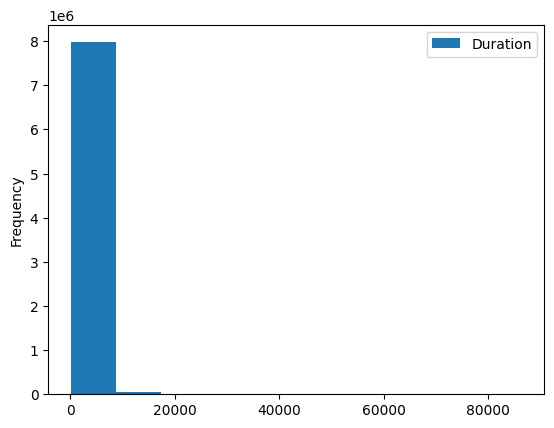

In [ ]:
plot_pdf = sorted_df[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot
#print("we have ", plot_df.count()," elements to plot")
print("we use '_pdf' to denote 'pandas data frame'")

plot_pdf.plot(kind="hist")
plt.show()

In [ ]:
# Assuming sorted_df is your DataFrame
missing_data = sorted_df.select([count(when(F.col(c).isNull(), c)).alias(c) for c in sorted_df.columns])

# Print the total missing data for each column
missing_data.show()

+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|       0|      0|       0|          103|            103|         0|              0|                0|
+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
# Drop the rows where all values are missing
sorted_df = sorted_df.dropna(how='all')

In [ ]:
# recall...
sorted_df.agg({"Duration": "min"}).show()
sorted_df.agg({"Duration": "mean"}).show()
sorted_df.agg({"Duration": "max"}).show()
sorted_df.agg({"Duration": "skewness"}).show()

+-------------+
|min(Duration)|
+-------------+
|           60|
+-------------+

+-----------------+
|    avg(Duration)|
+-----------------+
|1217.207713749445|
+-----------------+

+-------------+
|max(Duration)|
+-------------+
|        86400|
+-------------+

+------------------+
|skewness(Duration)|
+------------------+
|17.756909379614598|
+------------------+



In [ ]:
# Set the seed for reproducibility (optional)
sorted_df = sorted_df.withColumn("rand", F.rand())

In [ ]:
# Import necessary libraries
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Group data by month and rental site, and calculate total rentals and average duration
monthly_site_data = (
    sorted_df
    .withColumn("Month", F.month("Start Date"))
    .groupBy("Month", "StartStation Name")
    .agg(F.count("*").alias("Total Rentals"), F.avg("Duration").alias("Average Duration"))
    .orderBy("Month", "Total Rentals", ascending=[True, False])
)

# Define a window specification for ranking the sites by total rentals within each month
window_spec = Window.partitionBy("Month").orderBy(F.desc("Total Rentals"))

# Add a rank column to the data
ranked_site_data = (
    monthly_site_data
    .withColumn("Rank", F.row_number().over(window_spec))
    .filter(F.col("Rank") <= 10)  # keep only the top 10 sites for each month
)

# Show the results
ranked_site_data.show()

+-----+--------------------+-------------+------------------+----+
|Month|   StartStation Name|Total Rentals|  Average Duration|Rank|
+-----+--------------------+-------------+------------------+----+
|    1|Waterloo Station ...|         6155| 817.9301380991064|   1|
|    1|Belgrove Street ,...|         5643| 839.6810207336523|   2|
|    1|Finsbury Circus, ...|         3186| 755.6873822975518|   3|
|    1|Waterloo Station ...|         3175| 869.0456692913385|   4|
|    1|Wormwood Street, ...|         3088| 870.5440414507772|   5|
|    1|Hyde Park Corner,...|         2944|2226.9089673913045|   6|
|    1|Hop Exchange, The...|         2862| 827.1698113207547|   7|
|    1|Brushfield Street...|         2417|  865.891601158461|   8|
|    1|    Crosswall, Tower|         2401| 866.2890462307372|   9|
|    1|Sun Street, Liver...|         2220| 674.3783783783783|  10|
|    2|Waterloo Station ...|         5916| 830.3752535496957|   1|
|    2|Belgrove Street ,...|         5753|  935.345037371806| 

In [ ]:
# Import necessary libraries
from pyspark.sql import functions as F

# Group data by month and calculate total rentals and average duration
monthly_data = (
    sorted_df
    .withColumn("Month", F.month("Start Date"))
    .groupBy("Month")
    .agg(F.count("*").alias("Total Rentals"), F.avg("Duration").alias("Average Duration"))
    .orderBy("Month", ascending=True)
)

# Show the results
monthly_data.show()

+-----+-------------+------------------+
|Month|Total Rentals|  Average Duration|
+-----+-------------+------------------+
|    1|       485938|  986.995172223617|
|    2|       514246|1084.4444098738736|
|    3|       745700|1244.6869250368782|
|    4|       143887|1368.9859403559738|
|    5|       702118|1296.5400972486107|
|    6|       300356|1308.9007710849792|
|    7|      1164261|1354.7891581011474|
|    8|      1030830| 1393.831378597829|
|    9|       937551| 1206.009081105988|
|   10|       568951|1137.1522327933337|
|   11|       702979|1039.4782205442837|
|   12|       742853|1073.5830103667886|
+-----+-------------+------------------+



In [ ]:
# Find the month with the most rentals
max_rentals = monthly_data.agg(F.max("Total Rentals")).first()[0]
max_rentals_month = monthly_data.filter(F.col("Total Rentals") == max_rentals).first()["Month"]

print(f"The month with the most rentals is {max_rentals_month} with {max_rentals} rentals.")

The month with the most rentals is 7 with 1164261 rentals.


In [ ]:
# Compute the frequency distribution of the categorical columns : EndStation
sorted_df.groupBy('EndStation Name').count().show()

+--------------------+-----+
|     EndStation Name|count|
+--------------------+-----+
|Panton Street, We...|17041|
|Dunston Road , Ha...|14687|
|George Place Mews...| 9117|
|  Park Lane, Mayfair| 6146|
|Portland Place, M...|12903|
|Russell Gardens, ...| 4217|
|Montgomery Square...| 4439|
|Appold Street, Li...|13570|
|Kingsway Southbou...|11609|
|Gloucester Street...|11493|
|Embankment (Horse...|16492|
|Charlotte Street,...|11901|
|London Zoo, Regen...| 7614|
|Lambeth Road, Vau...| 6463|
|Cadogan Close, Vi...| 9628|
|Christopher Stree...|11721|
|Falcon Road, Clap...|12767|
|Queen Marys, Mile...|11363|
|Imperial Road, Sa...| 8623|
|Lancaster Gate , ...|10138|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Compute the frequency distribution of the categorical columns : StartStation
sorted_df.groupBy('StartStation Name').count().show()

+--------------------+-----+
|   StartStation Name|count|
+--------------------+-----+
|Panton Street, We...|15838|
|Dunston Road , Ha...|15507|
|George Place Mews...| 9556|
|  Park Lane, Mayfair| 6879|
|Portland Place, M...|13195|
|Russell Gardens, ...| 4523|
|Montgomery Square...| 4175|
|Kingsway Southbou...|10418|
|Appold Street, Li...|11872|
|Charlotte Street,...|11652|
|London Zoo, Regen...| 8268|
|Embankment (Horse...|14690|
|Lambeth Road, Vau...| 7011|
|Gloucester Street...|12935|
|Cadogan Close, Vi...| 9393|
|Christopher Stree...|10184|
|Falcon Road, Clap...|12407|
|Queen Marys, Mile...|11767|
|Finlay Street, Fu...| 6847|
|Imperial Road, Sa...| 8508|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Create a contingency table for the categorical columns 'EndStation Name' and 'StartStation Name'
contingency_table = (
    sorted_df
    .groupBy('EndStation Name', 'StartStation Name')
    .count()
    .groupBy('EndStation Name')
    .pivot('StartStation Name')
    .agg(first('count'))
)

# Print the contingency table
print(contingency_table.show())

+--------------------+---------------------------------+-----------------------------+-------------------------------+------------------------+------------------------------------+---------------------------+---------------------------------+------------------+---------------------------+--------------------------+----------------------+----------------------------+----------------------------------+---------------------------+-----------------------+----------------------+------------------------+---------------------------+------------------------+------------------------------+-----------------------------+----------------------------+---------------------+---------------------+---------------------------+---------------------------+---------------------+-------------------------------+---------------------------+-----------------------+---------------------------+--------------------------+----------------------+--------------------+---------------------+----------------------+----

In [ ]:
sorted_df.show()

+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+-------------------+
|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|               rand|
+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+-------------------+
|    1380|   8071|08/12/2013 00:23|          270|Kennington Lane R...|2013-12-08 00:00:00|            192|Wardour Street, Soho| 0.5565686206301838|
|     900|   7505|08/12/2013 00:15|           68|Theobalds Road , ...|2013-12-08 00:00:00|            298|Curlew Street, Sh...|0.24275764732294713|
|    1860|   6176|08/12/2013 00:31|          209|Denyer Street, Kn...|2013-12-08 00:00:00|            261|Princes Square, B...| 0.7630566574884288|
|    1920|   8634|08/12/2013 00:33|          236|Fashion Street, W...|2013-12-08 00:01:00|            106|Woodst

In [ ]:
# Filter data for rides starting from Baylis Road, Waterloo station
baylis_rides = sorted_df.filter(F.col("StartStation Name") == "Baylis Road, Waterloo")

# Filter data for rides starting from other stations
other_rides = sorted_df.filter(F.col("StartStation Name") != "Baylis Road, Waterloo")

In [ ]:
baylis_rides.show()

+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+--------------------+
|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|                rand|
+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+--------------------+
|     300|   3982|08/12/2013 00:25|          412|Cleaver Street, K...|2013-12-08 00:20:00|            272|Baylis Road, Wate...|  0.6252039306751969|
|     360|      9|08/12/2013 00:26|          412|Cleaver Street, K...|2013-12-08 00:20:00|            272|Baylis Road, Wate...| 0.00493395642937855|
|     300|   1303|08/12/2013 00:25|          412|Cleaver Street, K...|2013-12-08 00:20:00|            272|Baylis Road, Wate...| 0.33855924358811784|
|     360|   3141|08/12/2013 00:26|          412|Cleaver Street, K...|2013-12-08 00:20:00|            272|

In [ ]:
baylis_rides_nan = baylis_rides.filter(F.isnan("Duration")).count()
other_rides_nan = other_rides.filter(F.isnan("Duration")).count()

print(f"Number of NaN values in Baylis Road rides: {baylis_rides_nan}")
print(f"Number of NaN values in other stations rides: {other_rides_nan}")

Number of NaN values in Baylis Road rides: 0
Number of NaN values in other stations rides: 0


In [ ]:
# Calculate the variance of both samples
baylis_variance = baylis_rides.agg(F.variance("Duration")).collect()[0][0]
other_variance = other_rides.agg(F.variance("Duration")).collect()[0][0]

print(f"Baylis Road variance: {baylis_variance}")
print(f"Other stations variance: {other_variance}")

Baylis Road variance: 5014913.414685105
Other stations variance: 6713705.2618059935


In [ ]:
# Check the number of distinct values in the "Duration" column
baylis_distinct = baylis_rides.select(F.countDistinct("Duration")).collect()[0][0]
other_distinct = other_rides.select(F.countDistinct("Duration")).collect()[0][0]

print(f"Number of distinct values in Baylis Road rides: {baylis_distinct}")
print(f"Number of distinct values in other stations rides: {other_distinct}")

In [ ]:
# Print the schema for Baylis Road rides
print("Baylis Road rides schema:")
baylis_rides.printSchema()

# Print the schema for other stations rides
print("\nOther stations rides schema:")
other_rides.printSchema()

Baylis Road rides schema:
root
 |-- Duration: integer (nullable = true)
 |-- Bike Id: integer (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: integer (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: timestamp (nullable = true)
 |-- StartStation Id: integer (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- rand: double (nullable = false)


Other stations rides schema:
root
 |-- Duration: integer (nullable = true)
 |-- Bike Id: integer (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: integer (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: timestamp (nullable = true)
 |-- StartStation Id: integer (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- rand: double (nullable = false)



In [ ]:
# Calculate basic statistics for filtered Baylis Road rides
filtered_baylis_stats = baylis_rides.select([
    F.min("Duration").alias("min_duration"),
    F.max("Duration").alias("max_duration"),
    F.avg("Duration").alias("avg_duration"),
    F.count("Duration").alias("count"),
    F.sum("Duration").alias("total_duration")
])
filtered_baylis_stats.show()

# Calculate basic statistics for filtered other stations rides
filtered_other_stats = other_rides.select([
    F.min("Duration").alias("min_duration"),
    F.max("Duration").alias("max_duration"),
    F.avg("Duration").alias("avg_duration"),
    F.count("Duration").alias("count"),
    F.sum("Duration").alias("total_duration")
])
filtered_other_stats.show()

+------------+------------+-----------------+-----+--------------+
|min_duration|max_duration|     avg_duration|count|total_duration|
+------------+------------+-----------------+-----+--------------+
|          60|       82020|939.6262635630159|21566|      20263980|
+------------+------------+-----------------+-----+--------------+

+------------+------------+------------------+-------+--------------+
|min_duration|max_duration|      avg_duration|  count|total_duration|
+------------+------------+------------------+-------+--------------+
|          60|       86400|1217.9543143865433|8018104|    9765684360|
+------------+------------+------------------+-------+--------------+



In [ ]:
# Filter out durations less than 0 and greater than 24 hours (86400 seconds)
baylis_rides_filtered = baylis_rides.filter((F.col("Duration") >= 0) & (F.col("Duration") <= 86400))
other_rides_filtered = other_rides.filter((F.col("Duration") >= 0) & (F.col("Duration") <= 86400))

In [ ]:
from scipy.stats import ttest_ind

# Collect data as lists
baylis_durations = baylis_rides_filtered.select("Duration").rdd.flatMap(lambda x: x).collect()
other_durations = other_rides_filtered.select("Duration").rdd.flatMap(lambda x: x).collect()

# Perform t-test
t_statistic, p_value = ttest_ind(baylis_durations, other_durations, alternative='less')

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -15.758860305919647
p-value: 2.9907704970137915e-56
